# 여러 변수의 상관분석

> 아래 예제의 모든 데이터셋은 정규성과 등분산성을 충족한다고 가정한다.

## #01. 준비작업

### [1] 패키지 참조

In [17]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame
from scipy.stats import pearsonr

### [2] 데이터 가져오기

자동차 32종의 11개 속성에 대한 정보를 담고 있는 데이터

| 필드 | 설명 |
|---|---|
| mpg | 연료 효율성 (마일 당 갤런) |
| cyl | 실린더 수 |
| disp | 배기량 (cubic inches) |
| hp | 마력 (horsepower) |
| drat | 후륜축 비율 (rear axle ratio) |
| wt | 차량 무게 (1000 파운드) |
| qsec | 1/4 마일 달성 시간 (초) |
| vs | 엔진 유형 (0: V 엔진, 1: S 엔진) |
| am | 변속기 형태 (0: 자동, 1: 수동) |
| gear | 전진 기어 수 (전송 기어) |
| carb | 기화기 개수 (carburetors) |

In [19]:
origin = read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/수업자료/mtcars.xlsx')
origin

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


### [3] 그래프 초기화

In [18]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

## #02. 데이터 전처리

### [1] 분석 대상 컬럼만 추출

엔진 형태는 명목형 변수이므로 카테고리 타입으로 변환함

> 이 예제에서 카테고리 타입이 직접적인 분석 대상이 되지는 않는다. 산점도 행렬 시각화에서 카테고리 타입이 어떻게 반응하는지 확인하기 위함이다.

In [20]:
df = origin[['mpg', 'disp', 'hp','drat', 'wt', 'qsec', 'vs']]
df['vs'] = df['vs'].astype('category')
df

,mpg,disp,hp,drat,wt,qsec,vs
0,21.0,160.0,110,3.90,2.620,16.46,0
1,21.0,160.0,110,3.90,2.875,17.02,0
2,22.8,108.0,93,3.85,2.320,18.61,1
3,21.4,258.0,110,3.08,3.215,19.44,1
4,18.7,360.0,175,3.15,3.440,17.02,0
5,18.1,225.0,105,2.76,3.460,20.22,1
6,14.3,360.0,245,3.21,3.570,15.84,0
7,24.4,146.7,62,3.69,3.190,20.00,1
8,22.8,140.8,95,3.92,3.150,22.90,1
9,19.2,167.6,123,3.92,3.440,18.30,1


## #03. 산점도 행렬

각 변수들을 교차로 표현한 산점도 그래프의 묶음

### [1] 기본 사용

대각 원소자리에 히스토그램이 표현된다.

`plt.figure()` 초기화를 수행하지 않는다. (자동처리됨)

카테고리 타입은 자동으로 제외됨

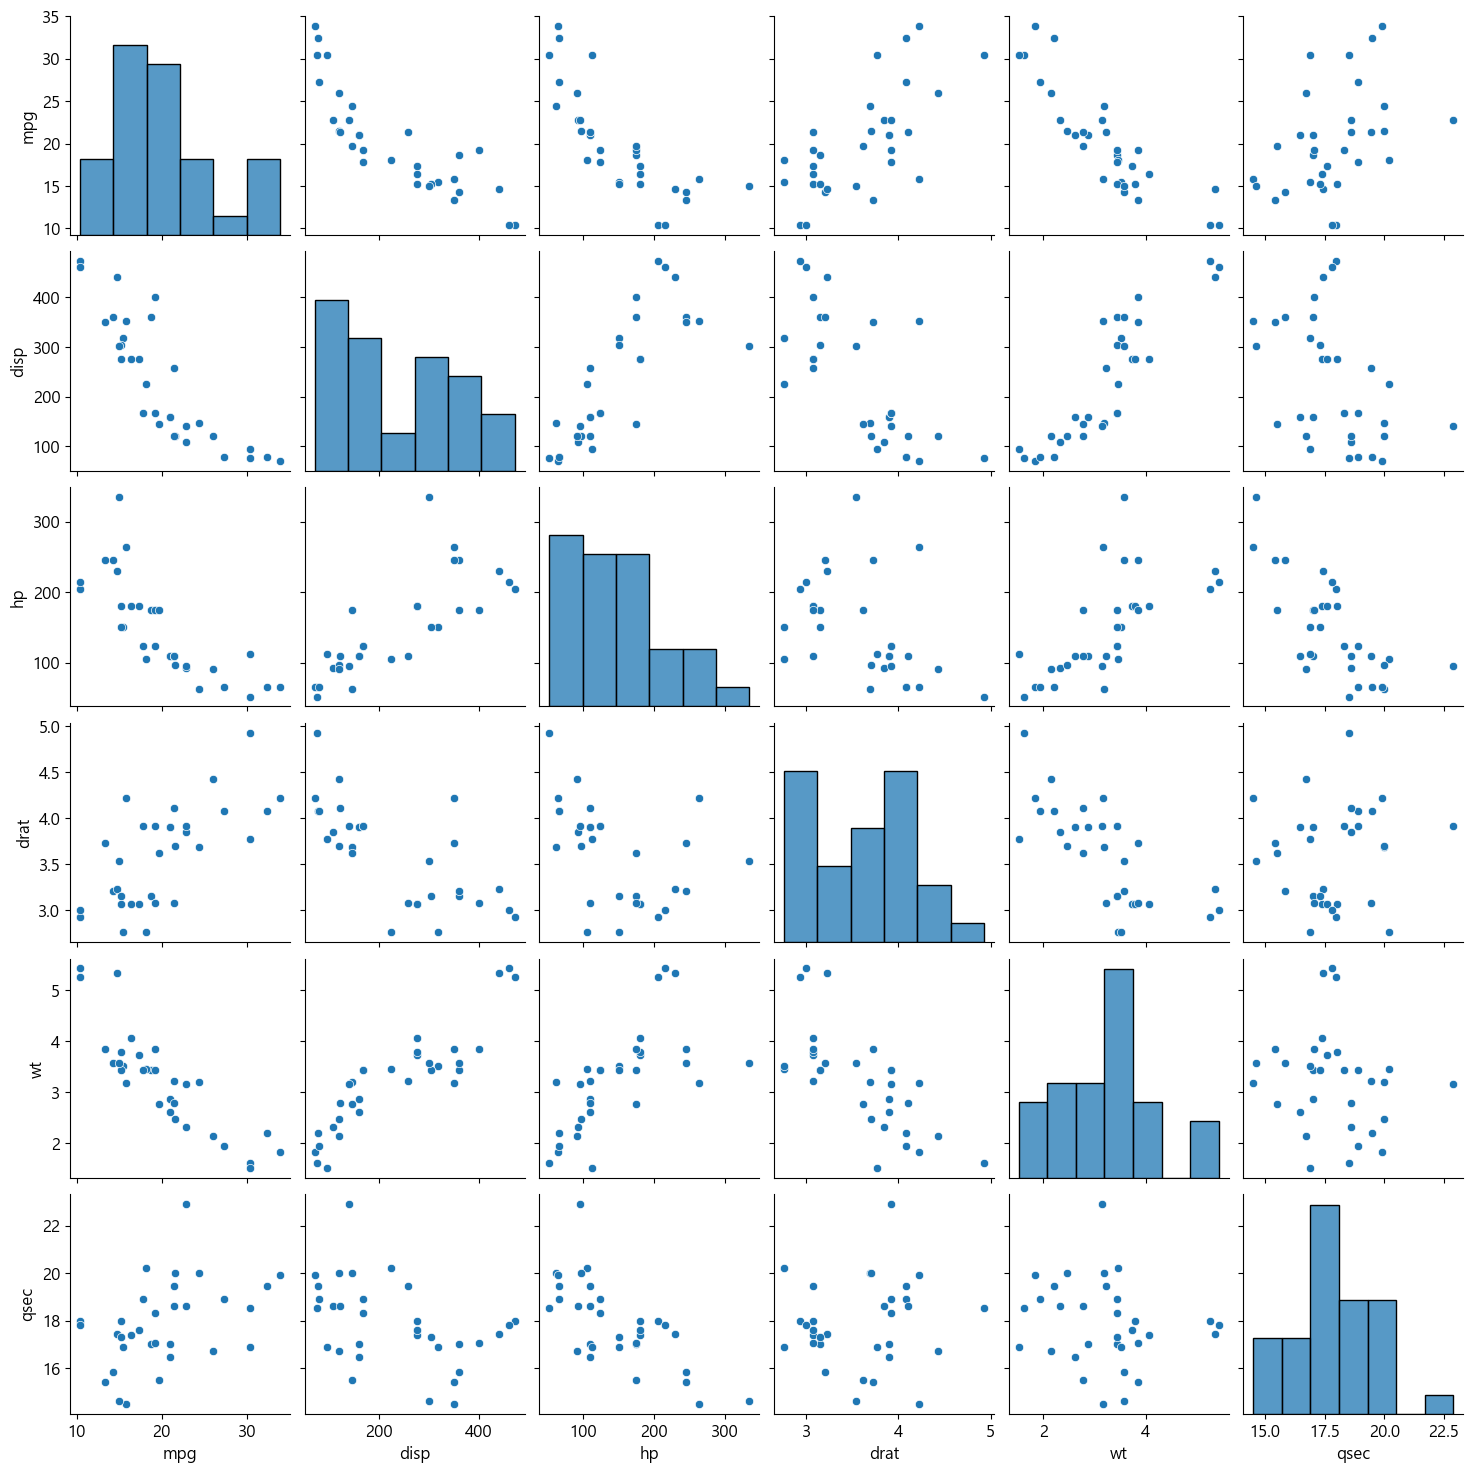

In [21]:
sb.pairplot(df)
plt.show()
plt.close()

### [2] 파라미터 설정

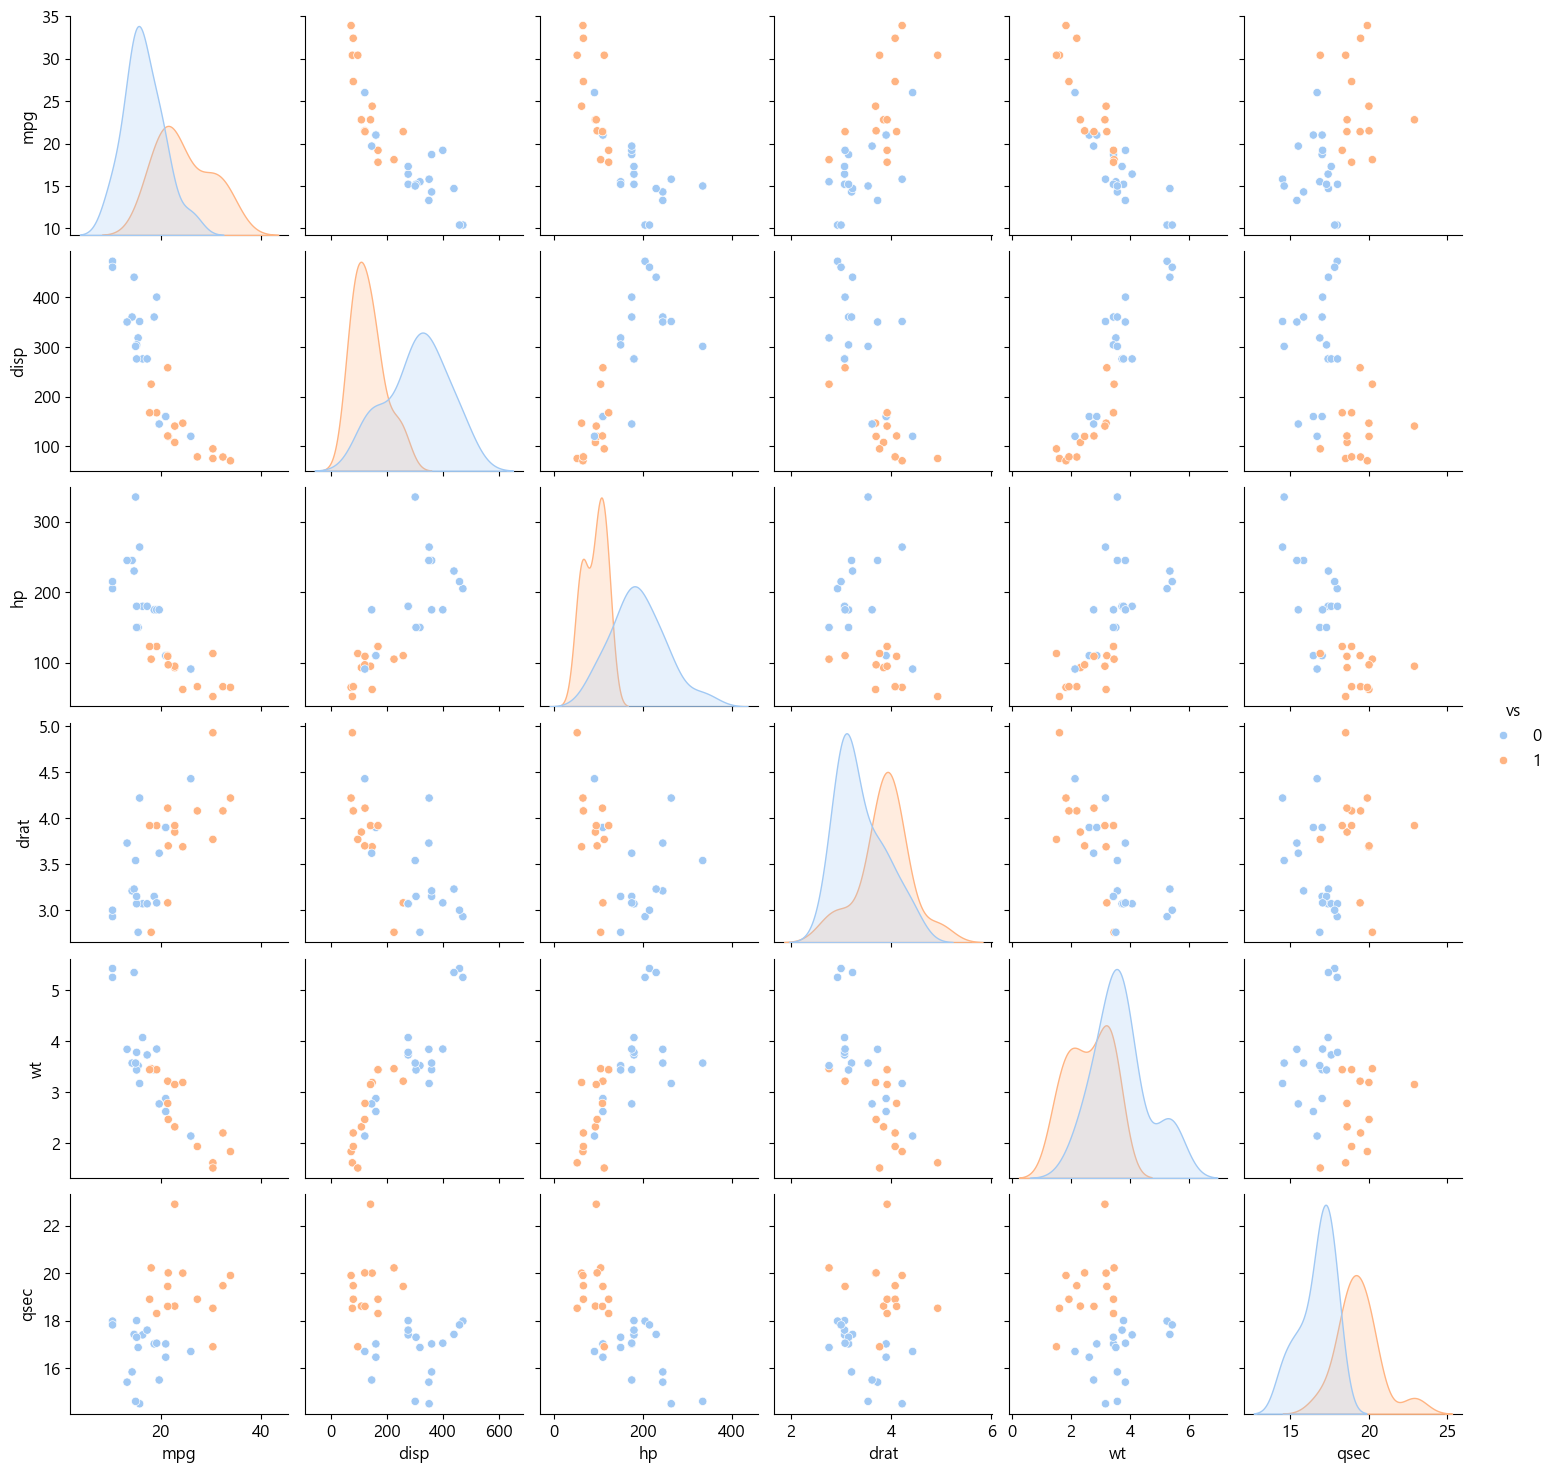

In [22]:
sb.pairplot(df,
            diag_kind='kde',
            hue = 'vs',
            palette='pastel')

plt.show()
plt.close()

### [3] 대각선 기준 다르게 표현하기

- 대각선 위 : 2차원 밀도함수 + 추세선
- 대각선 아래 : 2차원 밀도함수 + 산포도

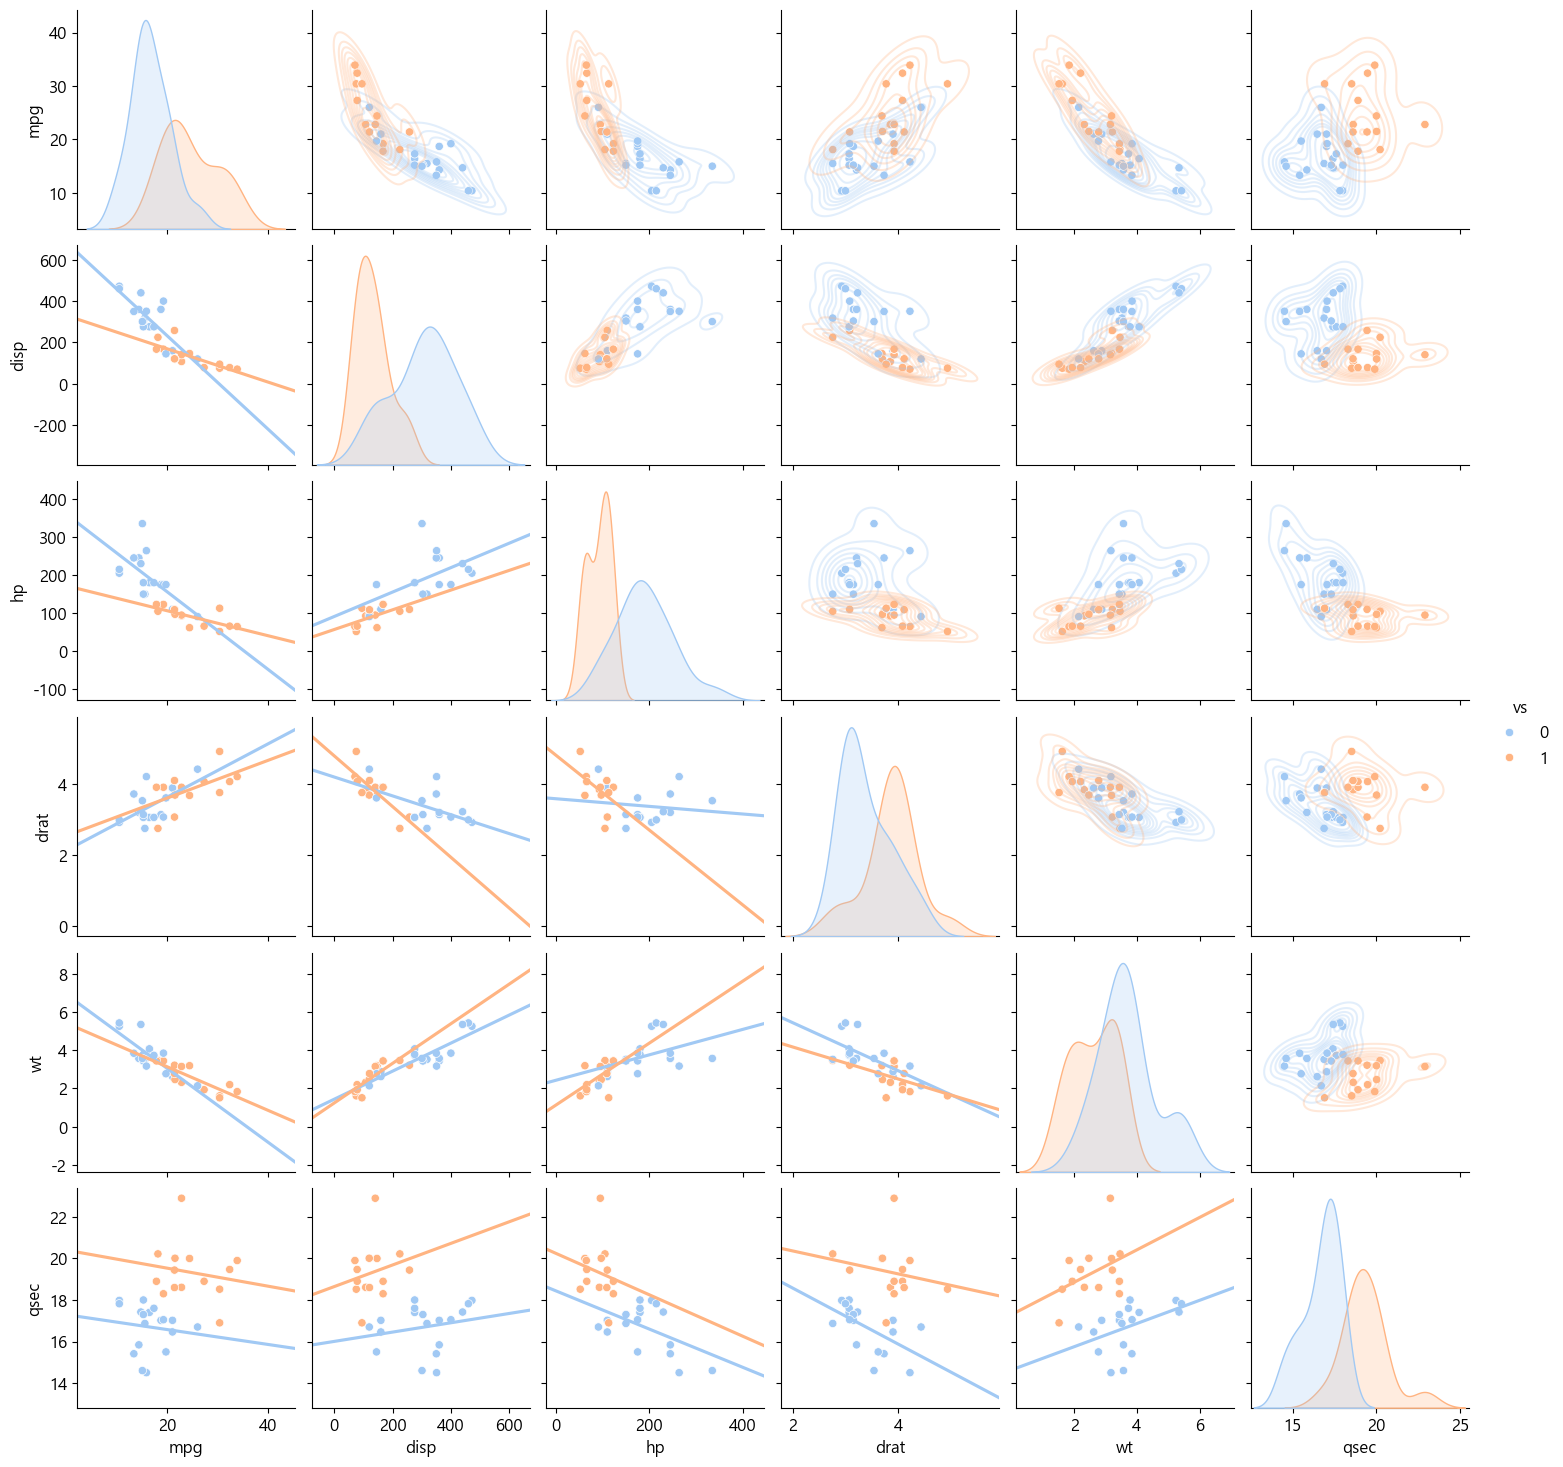

In [23]:
g = sb.pairplot(df,
                diag_kind='kde',
                hue = 'vs',
                palette='pastel')

g.map_upper(sb.kdeplot, alpha=0.3)
g.map_lower(sb.regplot, scatter=False, truncate = False, ci = False)

plt.show()
plt.close()

## #04. 상관계수 행렬

### [1] 상관계수 행렬 생성

여러 개의 변수를 갖는 데이터프레임에 대해서도 사용 가능

In [24]:
df2 = df.drop('vs', axis=1)
corr = df2.corr(method='pearson')
corr

,mpg,disp,hp,drat,wt,qsec
mpg,1.000000,-0.847551,-0.776168,0.681172,-0.867659,0.418684
disp,-0.847551,1.000000,0.790949,-0.710214,0.887980,-0.433698
hp,-0.776168,0.790949,1.000000,-0.448759,0.658748,-0.708223
drat,0.681172,-0.710214,-0.448759,1.000000,-0.712441,0.091205
wt,-0.867659,0.887980,0.658748,-0.712441,1.000000,-0.174716
qsec,0.418684,-0.433698,-0.708223,0.091205,-0.174716,1.000000


### [2] 상관계수 행렬 시각화

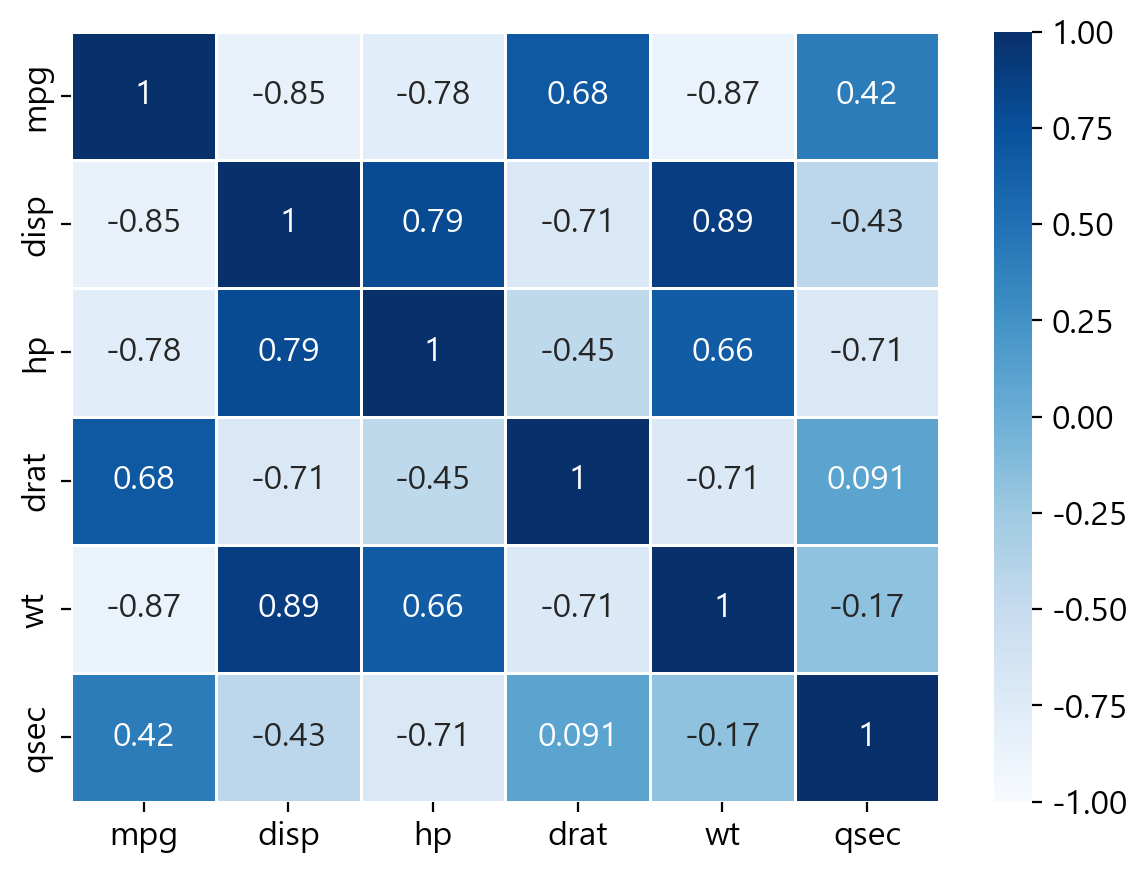

In [26]:
plt.figure(figsize=(7,5), dpi = 200)
sb.heatmap(df2.corr(method='pearson'), annot = True, cmap='Blues',
           vmin= -1, vmax= 1, linewidths=0.5)

plt.show()
plt.close()

## #05. 분석결과 검정

### [1] 개별 피어슨 상관 분석 수행

In [27]:
s, p = pearsonr(df2['mpg'],df2['disp'])
print('statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택'.format(s,p, '대립' if p <= 0.05 else '귀무'))


statistic: -0.848, p-value: 0.000, 대립가설 채택


### [2] 반복문을 통한 일괄 검정

In [29]:
names = df2.columns
n = len(names)
pv = 0.05

data = []

for i in range(0,n):
    j = i + 1 if i < n - 1 else 0

    fields = names[i] + 'vs' + names[j]
    s, p = pearsonr(df2[names[i]],df2[names[j]])
    result = p <=pv

    data.append({'fields': fields, 'statistic': s, 'p-value': p, 'result': result})

rdf = DataFrame(data)
rdf.set_index('fields', inplace=True)
rdf

,statistic,p-value,result
fields,,,
mpgvsdisp,-0.847551,9.380327e-10,True
dispvshp,0.790949,7.142679e-08,True
hpvsdrat,-0.448759,9.988772e-03,True
dratvswt,-0.712441,4.784260e-06,True
wtvsqsec,-0.174716,3.388683e-01,False
qsecvsmpg,0.418684,1.708199e-02,True
